# This first section is from the unit 4 challenge, my job for the unit 5 challenge is to duplicate these results to prove the reliability of my model.  The unit 5 assignment begins down below and is clearly marked.

# Analysis

1. I did the encoding manually as suggested in lesson 4.2.
2. Because the majority of the cities have populations less than 80,000 people, but big cities are skewing the data to the left, I'll remove any cities with populations greater than 80000.
3. The roberry and murder features have a .77 correlation, I will combine those two features to a robbery_murder feature, and then remove the indivual murder and robery features to avoid overfitting.
4.  with all of the above done, these are my numbers from the model, I don't think the Y-intercept is an acceptable number, but I'm not sure.
Coefficients: [[9.94521546e-03 1.67024834e-07 1.08623301e+02 5.13221382e+01 9.20938346e+01]]

Intercept: [25.13328351]

R-squared:
0.7836951292407518

Accuracy: 0.6992546390689116

RMS = 118.7557618546845

5.  After adding PCA into the model these are my ouputs

-0.6272097797924241

Coefficients: [[1.095515]]

Intercept: [7.76923875e-17]

R-squared:-0.6272097797924241

RMS = 608.6581443067461
print(pca.explained_variance_ratio_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Robbery', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
#dataset = dataset[dataset.Population < 80000]






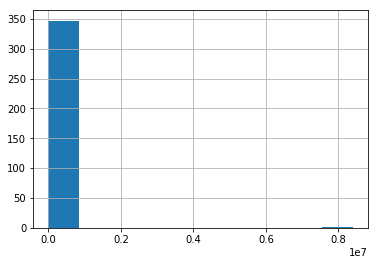

In [2]:
dataset.Population.hist()


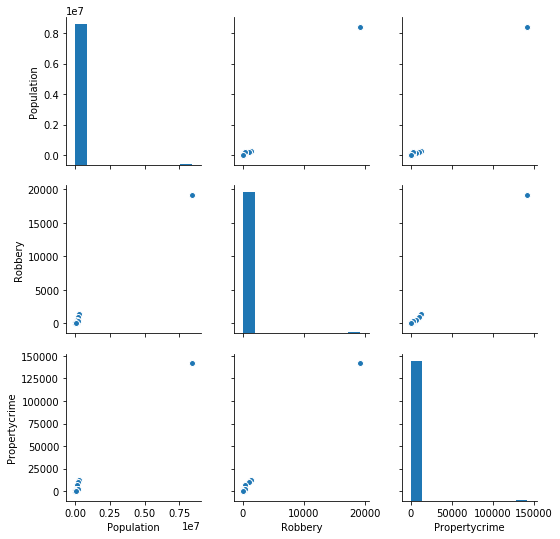

In [3]:
import seaborn as sns
sns.pairplot(dataset)

               Population   Robbery  Propertycrime
Population       1.000000  0.998469       0.996265
Robbery          0.998469  1.000000       0.998237
Propertycrime    0.996265  0.998237       1.000000


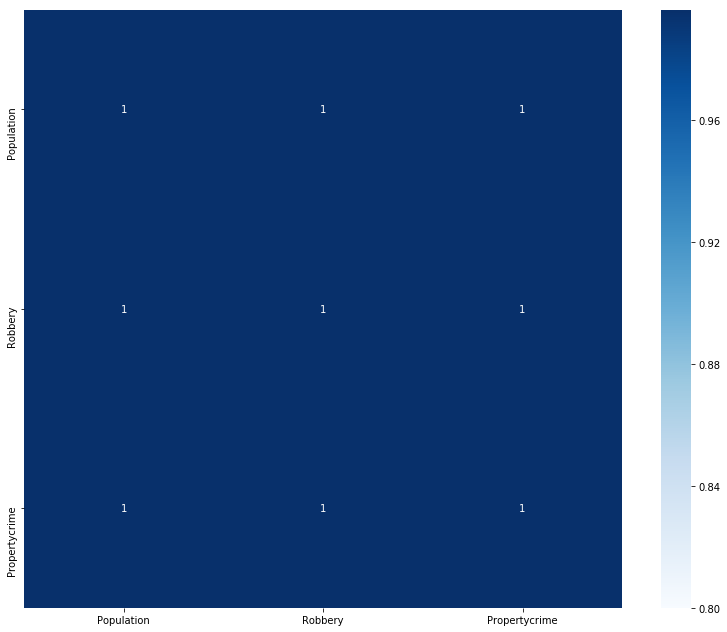

In [4]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [5]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
linear_formula = 'Propertycrime ~ Population+Robbery'
lm = smf.ols(formula=linear_formula, data=dataset).fit()

In [6]:
lm.params

Intercept     272.335980
Population     -0.002466
Robbery         8.490664
dtype: float64

In [7]:
lm.pvalues

Intercept     4.454822e-23
Population    1.182128e-02
Robbery       1.688471e-59
dtype: float64

In [8]:
lm.rsquared

0.9965412427380501

In [9]:
lm.conf_int()

,0,1
Intercept,222.025425,322.646536
Population,-0.004382,-0.000549
Robbery,7.654275,9.327052


# Now I'll log transform the New York data and run the ols function again.

In [10]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
logdataset = dataset[['logpopulation', 'logrobbery', 'logpropertycrime']]

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


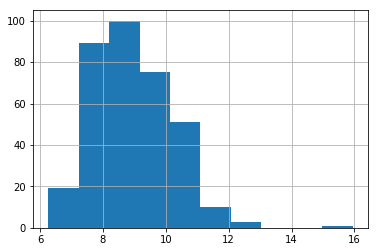

In [11]:
logdataset.logpopulation.hist()


In [12]:
logdataset.head()

,logpopulation,logrobbery,logpropertycrime
0,7.528869,0.000000,2.484907
1,7.854381,0.000000,3.178054
2,7.953670,0.000000,2.772589
3,11.492274,5.424950,8.316300
4,8.762177,1.386294,5.407172


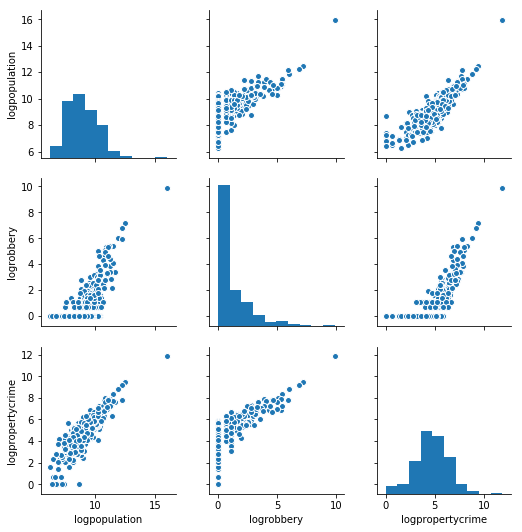

In [13]:
import seaborn as sns
sns.pairplot(logdataset)

                  logpopulation  logrobbery  logpropertycrime
logpopulation          1.000000    0.787111          0.864871
logrobbery             0.787111    1.000000          0.766258
logpropertycrime       0.864871    0.766258          1.000000


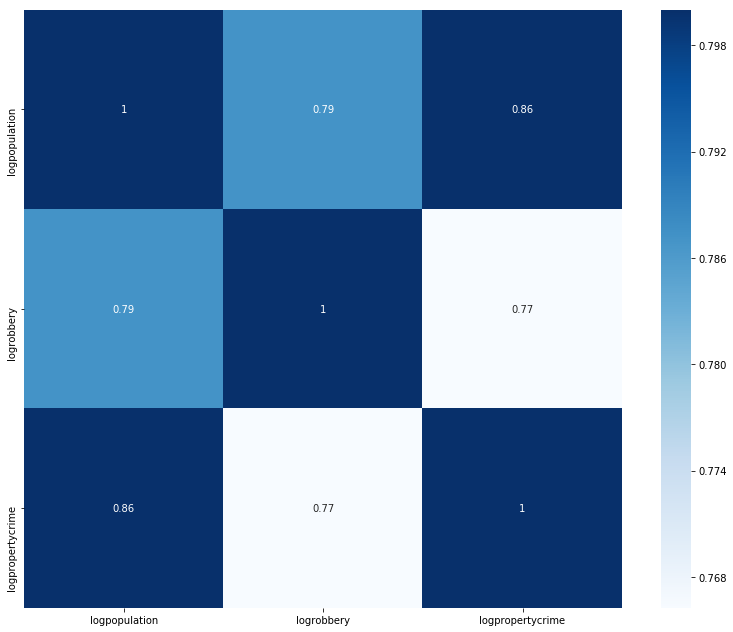

In [14]:
# Make the correlation matrix.
corrmat = logdataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [15]:
linear_formula = 'logpropertycrime ~ logpopulation+logrobbery'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [16]:
lm.params

Intercept       -4.119307
logpopulation    0.956710
logrobbery       0.257948
dtype: float64

In [17]:
lm.pvalues

Intercept        1.107171e-15
logpopulation    7.681314e-45
logrobbery       1.716115e-07
dtype: float64

In [18]:
lm.rsquared

0.7672202843438851

In [19]:
lm.conf_int()

,0,1
Intercept,-5.082833,-3.155782
logpopulation,0.841525,1.071896
logrobbery,0.162885,0.353012


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = logdataset[['logpopulation','logrobbery']]
target = logdataset[['logpropertycrime']]

reg = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.7877974034658453
Testing on Sample: 0.7672202843438852


In [21]:
X = logdataset[['logpopulation','logrobbery']]
y = logdataset[['logpropertycrime']]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print(scores)

[0.85878464 0.84319719 0.35546871 0.81649034 0.73689439 0.65008082
 0.78919571 0.79921132 0.70666352 0.78759002]


# Now I'll run the New York data again, but with cities over 80k removed.

In [22]:
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Robbery', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
dataset = dataset[dataset.Population < 80000]

In [23]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
logdataset = dataset[['logpopulation', 'logrobbery', 'logpropertycrime']]

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


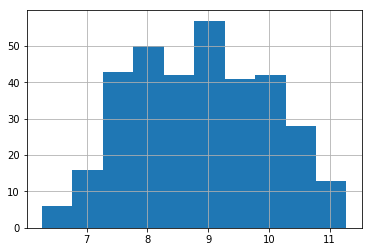

In [24]:
logdataset.logpopulation.hist()


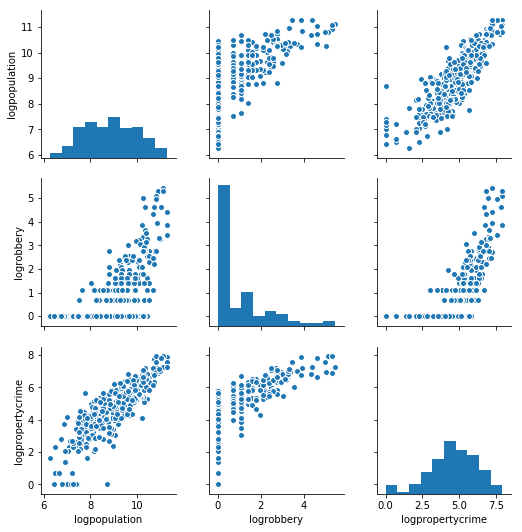

In [25]:
import seaborn as sns
sns.pairplot(logdataset)

                  logpopulation  logrobbery  logpropertycrime
logpopulation          1.000000    0.723149          0.840736
logrobbery             0.723149    1.000000          0.718547
logpropertycrime       0.840736    0.718547          1.000000


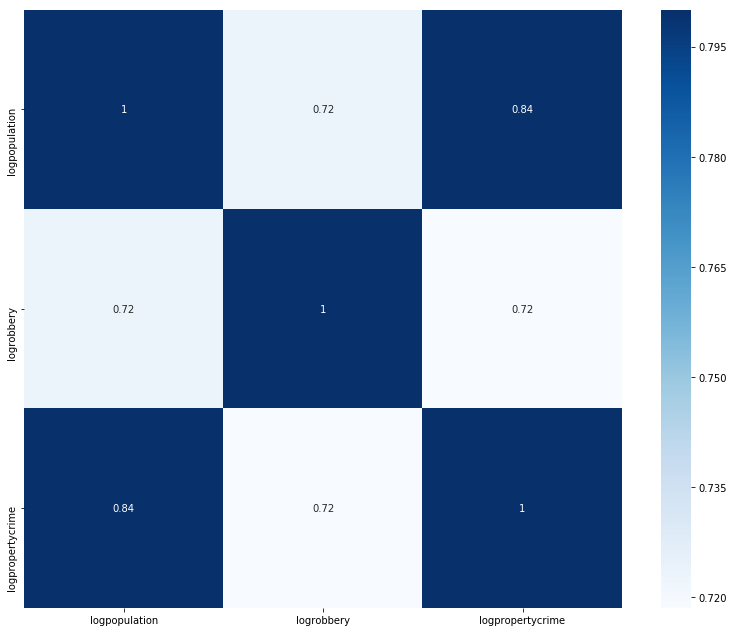

In [26]:
# Make the correlation matrix.
corrmat = logdataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [27]:
linear_formula = 'logpropertycrime ~ logpopulation+logrobbery'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [28]:
lm.params

Intercept       -4.351843
logpopulation    0.981114
logrobbery       0.294351
dtype: float64

In [29]:
lm.pvalues

Intercept        1.335278e-16
logpopulation    5.416489e-45
logrobbery       3.173129e-08
dtype: float64

In [30]:
lm.rsquared

0.7324644651755337

In [31]:
lm.conf_int()

,0,1
Intercept,-5.333749,-3.369937
logpopulation,0.863807,1.098422
logrobbery,0.192138,0.396564


In [32]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = logdataset[['logpopulation','logrobbery']]
target = logdataset[['logpropertycrime']]

reg = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.7002913570941443
Testing on Sample: 0.7324644651755335


In [33]:
X = logdataset[['logpopulation','logrobbery']]
y = logdataset[['logpropertycrime']]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print(scores)

[0.80231611 0.78802681 0.39522766 0.79753618 0.73707855 0.62738699
 0.75125545 0.73138987 0.64480253 0.78783027]


# Now I'll add arson to the New York dataframe as one of the features to see if it will add to the accuracy, these features will be log transformed

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Robbery', 'Arson', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Robbery', 'Arson', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
#dataset = dataset[dataset.Population < 80000]

In [35]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
dataset['logarson'] =  np.where(dataset.Arson > 0, np.log(dataset.Arson), 0)

logdataset = dataset[['logpopulation', 'logrobbery', 'logarson', 'logpropertycrime']]

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


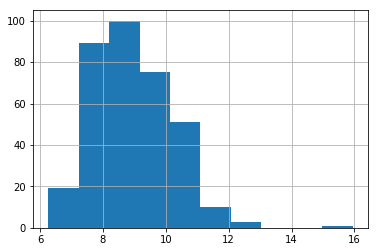

In [36]:
logdataset.logpopulation.hist()


In [37]:
logdataset.head()

,logpopulation,logrobbery,logarson,logpropertycrime
0,7.528869,0.000000,0.0,2.484907
1,7.854381,0.000000,0.0,3.178054
2,7.953670,0.000000,0.0,2.772589
3,11.492274,5.424950,0.0,8.316300
4,8.762177,1.386294,0.0,5.407172


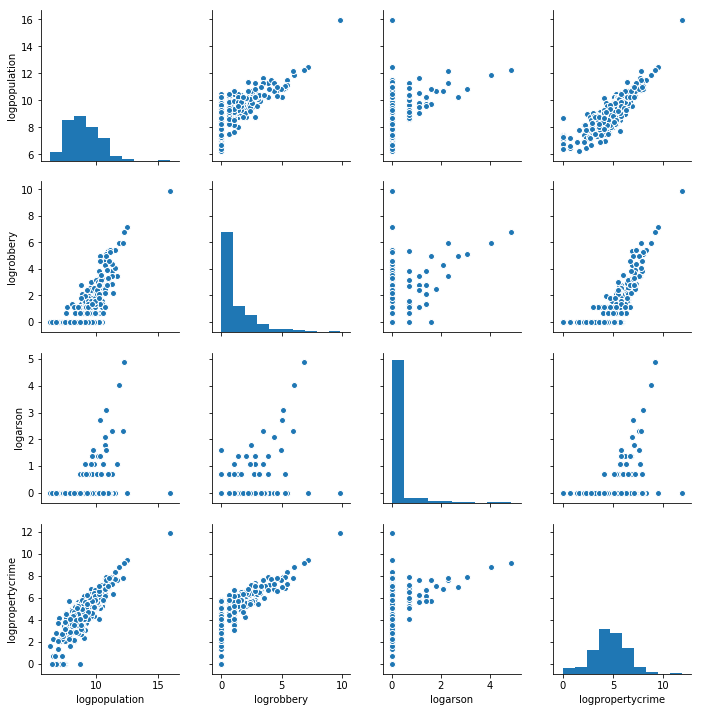

In [38]:
import seaborn as sns
sns.pairplot(logdataset)

                  logpopulation  logrobbery  logarson  logpropertycrime
logpopulation          1.000000    0.787111  0.356353          0.864871
logrobbery             0.787111    1.000000  0.467995          0.766258
logarson               0.356353    0.467995  1.000000          0.356319
logpropertycrime       0.864871    0.766258  0.356319          1.000000


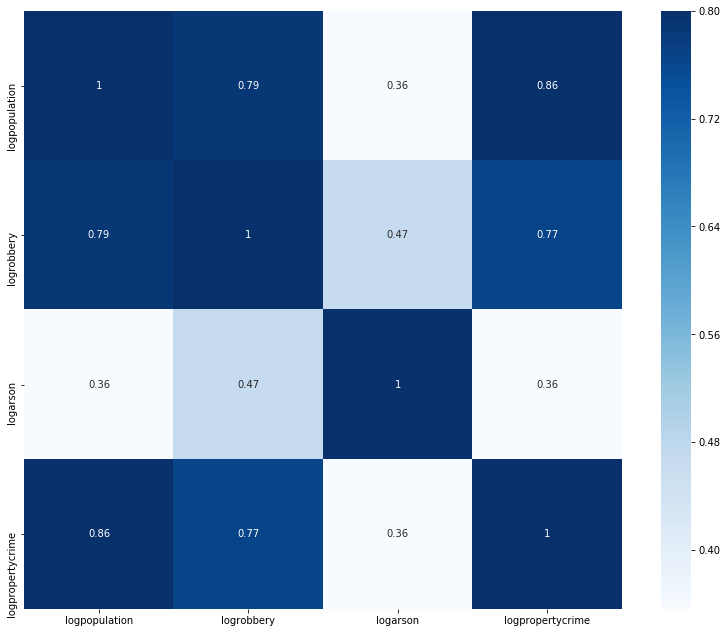

In [39]:
# Make the correlation matrix.
corrmat = logdataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [40]:
linear_formula = 'logpropertycrime ~ logpopulation+logrobbery+logarson'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [41]:
lm.params

Intercept       -4.121423
logpopulation    0.957047
logrobbery       0.253617
logarson         0.025331
dtype: float64

In [42]:
lm.pvalues

Intercept        1.183282e-15
logpopulation    9.930119e-45
logrobbery       1.136009e-06
logarson         7.949419e-01
dtype: float64

In [43]:
lm.rsquared

0.7672660546333255

In [44]:
lm.conf_int()

,0,1
Intercept,-5.086396,-3.156450
logpopulation,0.841676,1.072417
logrobbery,0.152947,0.354287
logarson,-0.166222,0.216884


In [45]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = logdataset[['logpopulation','logrobbery', 'logarson']]
target = logdataset[['logpropertycrime']]

reg = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.7855195027286235
Testing on Sample: 0.7672660546333255


In [46]:
X = logdataset[['logpopulation','logrobbery', 'logarson']]
y = logdataset[['logpropertycrime']]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print(scores)

[0.85813768 0.84277235 0.35580502 0.81489926 0.73601605 0.65034152
 0.78585279 0.7994455  0.70680916 0.78403564]


# The new dataset for validation begins here, texas_crime_2013

In [47]:
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Robbery', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
#dataset = dataset[dataset.Population < 80000]

In [48]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
logdataset = dataset[['logpopulation', 'logrobbery', 'logpropertycrime']]

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


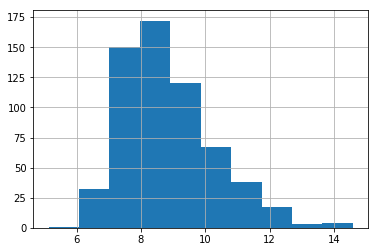

In [49]:
logdataset.logpopulation.hist()


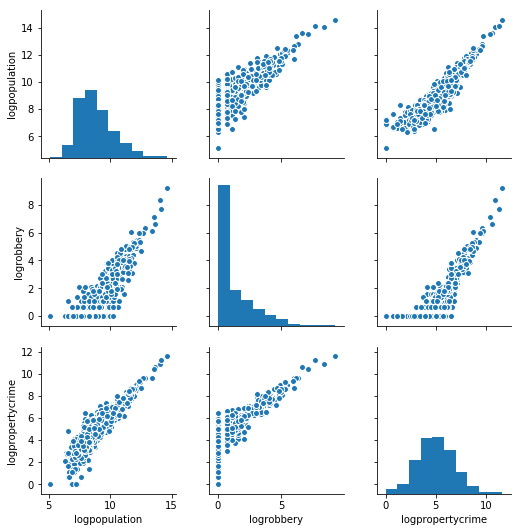

In [50]:
import seaborn as sns
sns.pairplot(logdataset)

                  logpopulation  logrobbery  logpropertycrime
logpopulation          1.000000    0.863631          0.915042
logrobbery             0.863631    1.000000          0.853067
logpropertycrime       0.915042    0.853067          1.000000


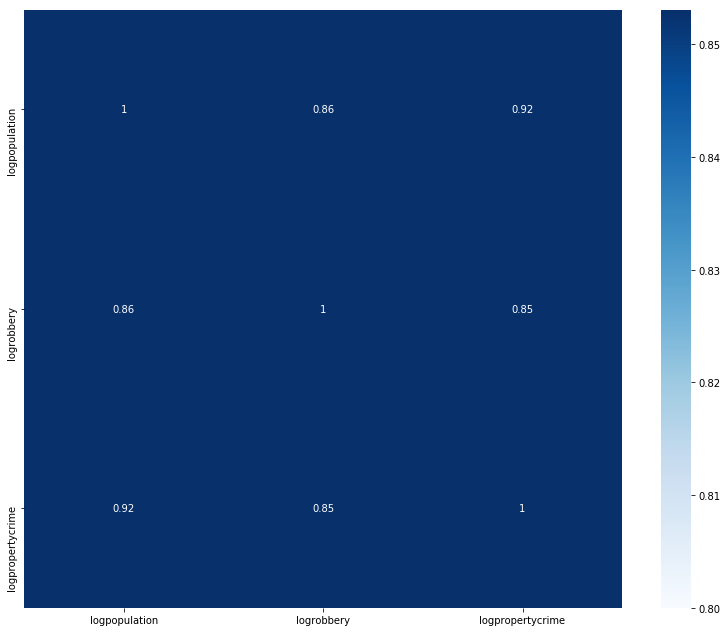

In [51]:
# Make the correlation matrix.
corrmat = logdataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [52]:
linear_formula = 'logpropertycrime ~ logpopulation + logrobbery'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()
#lm = smf.ols(formula=linear_formula, data=logdataset)
#res = lm.fit()
#print(res.summary())

In [53]:
lm.params

Intercept       -3.387249
logpopulation    0.909833
logrobbery       0.288462
dtype: float64

In [54]:
lm.pvalues

Intercept        7.200959e-24
logpopulation    2.479737e-82
logrobbery       8.520304e-15
dtype: float64

In [55]:
lm.rsquared

0.852824062125195

In [56]:
lm.conf_int()

,0,1
Intercept,-4.019639,-2.754860
logpopulation,0.830777,0.988889
logrobbery,0.217305,0.359619


In [57]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = logdataset[['logpopulation','logrobbery']]
target = logdataset[['logpropertycrime']]

reg = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.8635834124383075
Testing on Sample: 0.852824062125195


In [58]:
X = logdataset[['logpopulation','logrobbery']]
y = logdataset[['logpropertycrime']]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print(scores)

[0.8529523  0.84687503 0.89707201 0.8795304  0.75630823 0.86078685
 0.85216018 0.84448817 0.7962749  0.87546867]


# Now I'll add arson to theTexas dataframe as one of the features to see if it will add to the accuracy, these features will be log transformed

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('texas_crime_2013.csv')
dataset = dataset[['Population', 'Robbery', 'Arson', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Robbery', 'Arson', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
#dataset = dataset[dataset.Population < 80000]

In [60]:
dataset['logpopulation'] = np.log(dataset.Population)
dataset['logpropertycrime'] =  np.where(dataset.Propertycrime > 0, np.log(dataset.Propertycrime), 0)
dataset['logrobbery'] =  np.where(dataset.Robbery > 0, np.log(dataset.Robbery), 0)
dataset['logarson'] =  np.where(dataset.Arson > 0, np.log(dataset.Arson), 0)

logdataset = dataset[['logpopulation', 'logrobbery', 'logarson', 'logpropertycrime']]

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


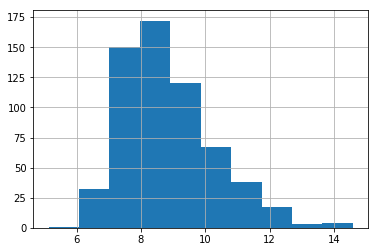

In [61]:
logdataset.logpopulation.hist()


In [62]:
logdataset.head()

,logpopulation,logrobbery,logarson,logpropertycrime
0,7.944847,0.000000,0.000000,2.484907
1,11.690243,4.828314,2.772589,8.469892
2,9.677904,2.397895,0.000000,6.664409
3,9.845647,3.295837,0.000000,7.197435
4,8.915029,0.693147,0.000000,5.459586


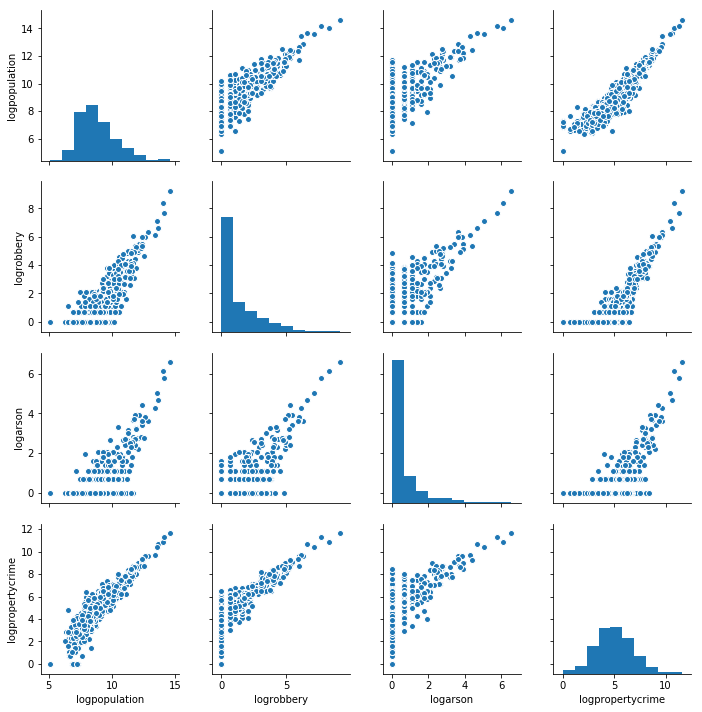

In [63]:
import seaborn as sns
sns.pairplot(logdataset)

                  logpopulation  logrobbery  logarson  logpropertycrime
logpopulation          1.000000    0.863631  0.709241          0.915042
logrobbery             0.863631    1.000000  0.769396          0.853067
logarson               0.709241    0.769396  1.000000          0.667261
logpropertycrime       0.915042    0.853067  0.667261          1.000000


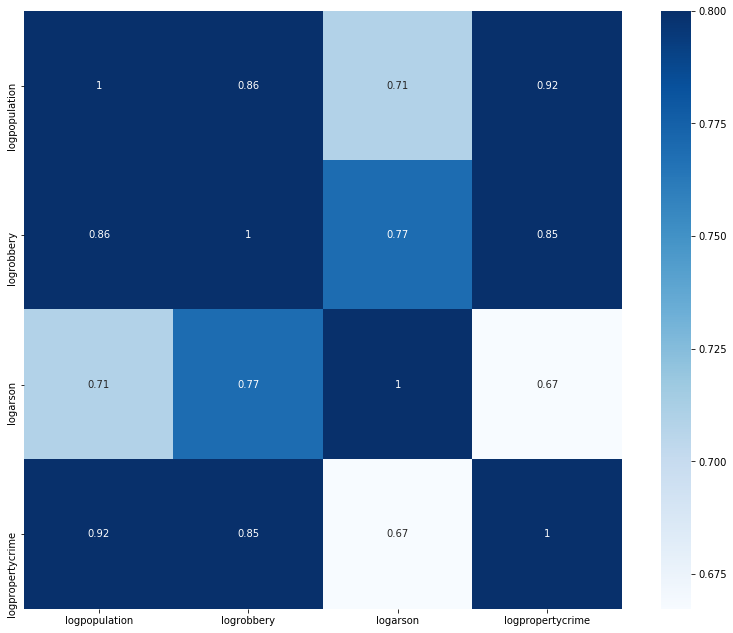

In [64]:
# Make the correlation matrix.
corrmat = logdataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [65]:
linear_formula = 'logpropertycrime ~ logpopulation+logrobbery+logarson'
lm = smf.ols(formula=linear_formula, data=logdataset).fit()

In [66]:
lm.params

Intercept       -3.489434
logpopulation    0.921532
logrobbery       0.325362
logarson        -0.098825
dtype: float64

In [67]:
lm.pvalues

Intercept        9.810626e-25
logpopulation    5.421645e-83
logrobbery       3.576772e-15
logarson         3.832266e-02
dtype: float64

In [68]:
lm.rsquared

0.8538736443990061

In [69]:
lm.conf_int()

,0,1
Intercept,-4.127458,-2.851410
logpopulation,0.841919,1.001145
logrobbery,0.246278,0.404445
logarson,-0.192316,-0.005333


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

data = logdataset[['logpopulation','logrobbery', 'logarson']]
target = logdataset[['logpropertycrime']]

reg = linear_model.LinearRegression()

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=5)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(data, target).score(data, target)))

With 20% Holdout: 0.8653640959375681
Testing on Sample: 0.8538736443990061


In [71]:
X = logdataset[['logpopulation','logrobbery', 'logarson']]
y = logdataset[['logpropertycrime']]
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, cv=10)
print(scores)

[0.85455207 0.84442288 0.90106544 0.88310142 0.75871295 0.86022084
 0.85242888 0.84504662 0.79728301 0.87351373]


# Final analysis

For this exercise I needed a regression model that could be applied to data (crime statistics of all cities and towns within a given state) with an extremely large variance in their population features, and this needed to be done without eliminating large amounts of the data in order to eliminate outliers.  The model also needed to generate consistent R-squared values, and consistently significant parameters.  Using the statsmodels ols function I was able to do this, although due to the large variability I did have to log transform all of the features.

The exercise called for predicting the occurance of property crime based on other crimes that were committed, the only features that had significance in predicting property crime were robbery and population.

R-squared values were .7672 for New York and .8528 for Texas.

I also tried adding in a feature for arson, however the P-values were insignificant, meaning that adding the crime of arson into my model did not add accuracy.

There are a lot of numbers I still don't understand, hoping to get some clarification from my mentor.